In [2]:
import pandas as pd

sales_data = pd.read_csv('retail_sales_dataset.csv')

#print(sales_data)

# print(sales_data.info()) # .info() shows us null values if there are any.
# print(sales_data.describe()) # show us values like mean, std, min, max


# import matplotlib.pyplot as plt

# print(sales_data.columns)

# sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# sales_data.groupby('Date')['Total Amount'].sum().plot(title='Total Amount Trends Over Time')

# plt.show()


print(sales_data.info())
print(sales_data.describe())
print(sales_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    

In [8]:
sales_data['Gender'].value_counts()


Female    510
Male      490
Name: Gender, dtype: int64

In [9]:
sales_data['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [10]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

<AxesSubplot:title={'center':'Daily Sales Trends'}, xlabel='Date'>

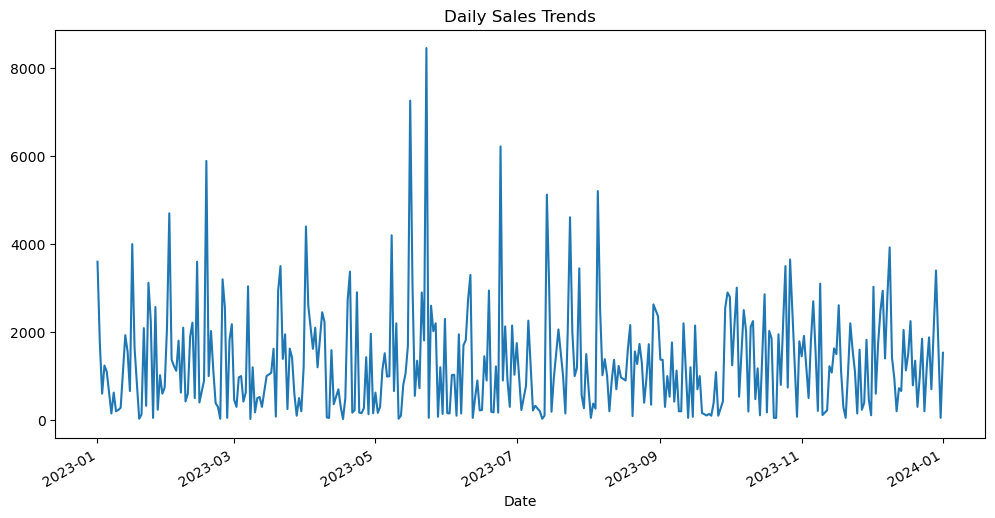

In [13]:
daily_sales = sales_data.groupby('Date')['Total Amount'].sum()
daily_sales.plot(figsize=(12, 6), title='Daily Sales Trends')

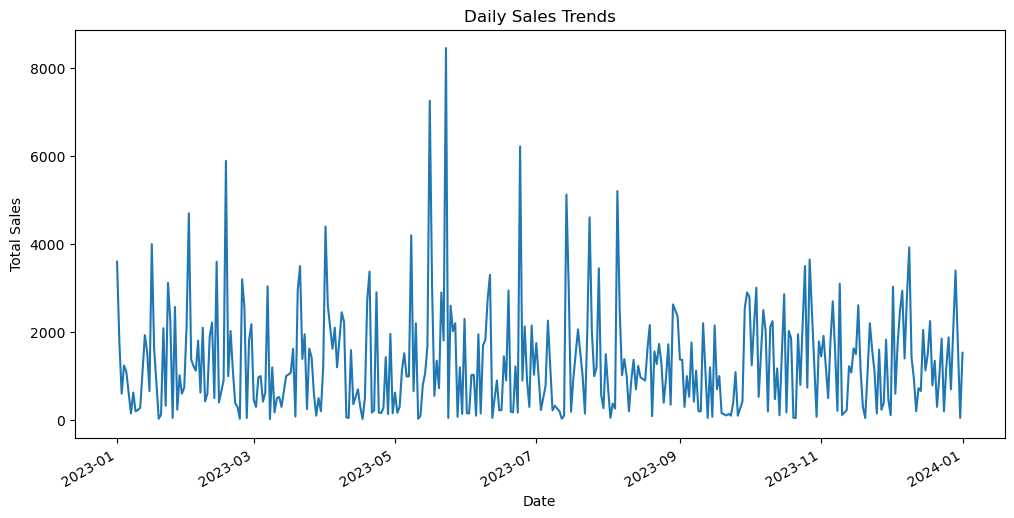

In [16]:
import matplotlib.pyplot as plt
daily_sales.plot(figsize=(12, 6), title='Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

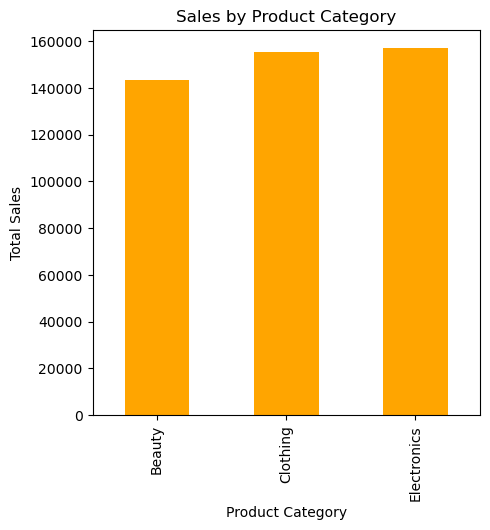

In [24]:
category_sales = sales_data.groupby('Product Category')['Total Amount'].sum()
category_sales.sort_values().plot(kind='bar', figsize=(5, 5), title='Sales by Product Category', color='orange')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='Gender'>

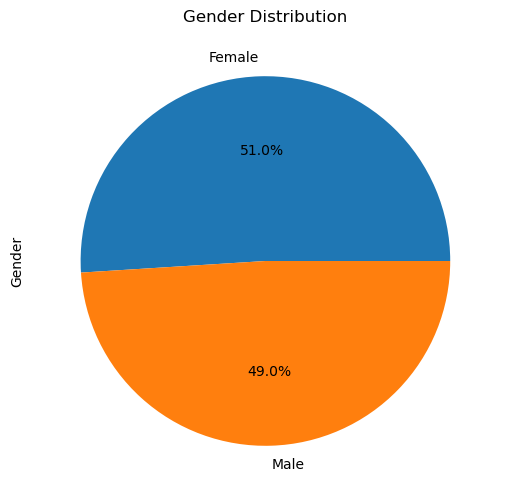

In [34]:

sales_data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6), title='Gender Distribution')

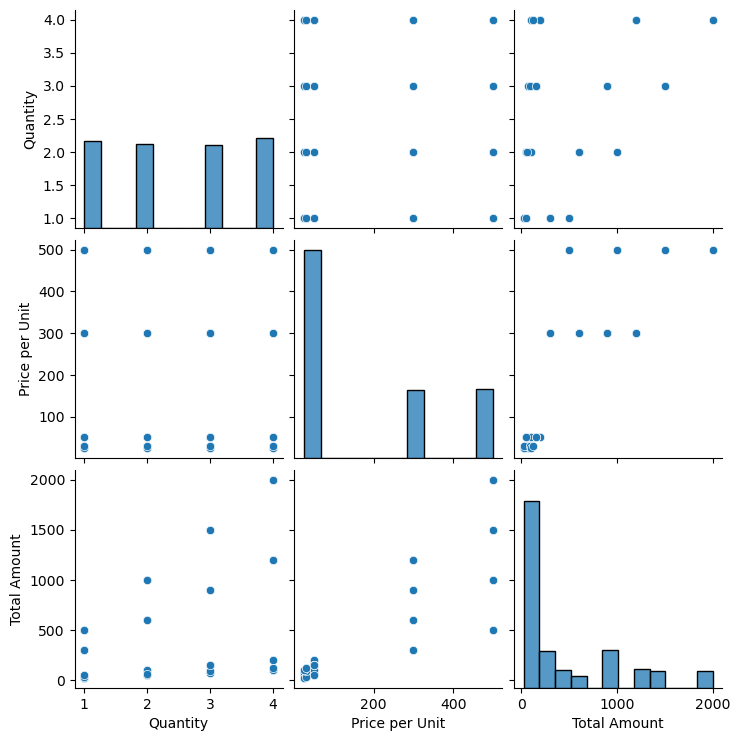

In [36]:
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(sales_data[['Quantity', 'Price per Unit', 'Total Amount']])
plt.show()

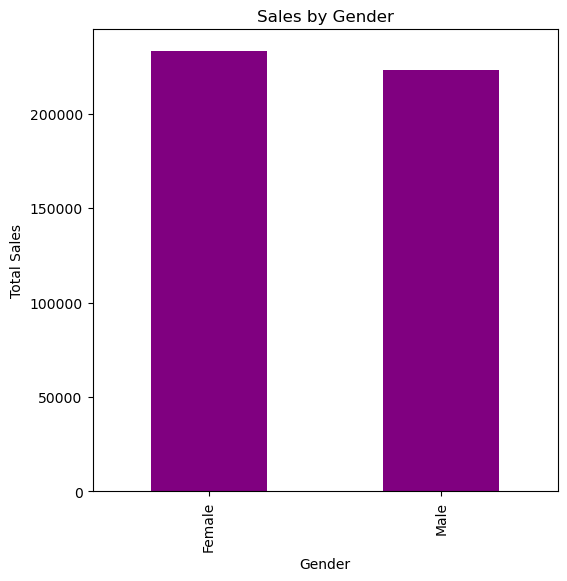

In [38]:
gender_sales = sales_data.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='bar', figsize=(6, 6), title='Sales by Gender', color='purple')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

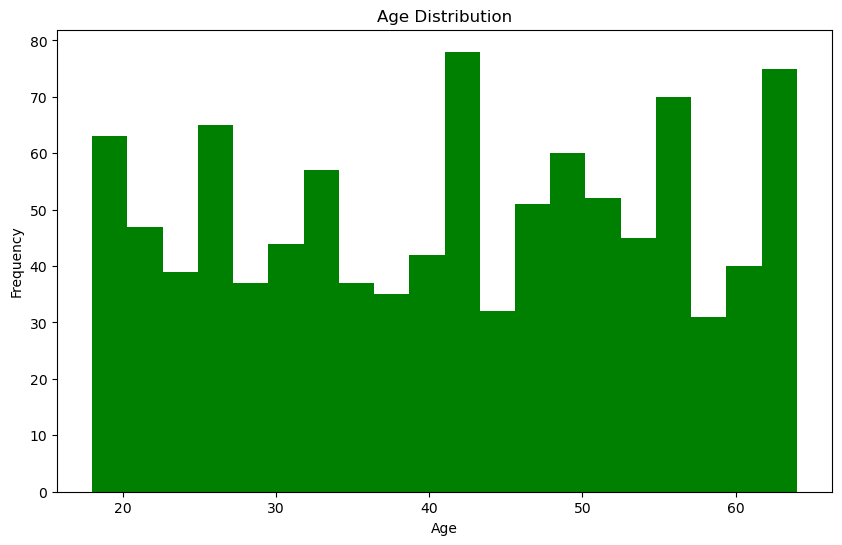

In [40]:
sales_data['Age'].plot(kind='hist', bins=20, figsize=(10, 6), title='Age Distribution', color='green')
plt.xlabel('Age')
plt.show()



In [44]:
daily_sales = sales_data.groupby('Date')['Total Amount'].sum()

In [46]:
# now lets begin to focus on outliers. Outliers are the numbers who behave different than the rest of the numbers.  

<AxesSubplot:title={'center':'total amounts distribution'}>

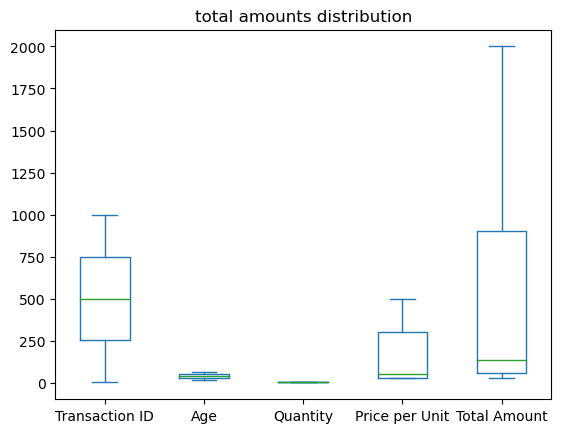

In [50]:
sales_data.plot(kind='box', title = 'total amounts distribution')

In [58]:
from scipy.stats import zscore

sales_data['Z-score'] = zscore(sales_data['Total Amount'])

outliers = sales_data[abs(sales_data['Z-score'])>2]

print(outliers)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
14               15 2023-01-16     CUST015  Female   42      Electronics   
64               65 2023-12-05     CUST065    Male   51      Electronics   
71               72 2023-05-23     CUST072  Female   20      Electronics   
73               74 2023-11-22     CUST074  Female   18           Beauty   
88               89 2023-10-01     CUST089  Female   55      Electronics   
92               93 2023-07-14     CUST093  Female   35           Beauty   
108             109 2023-10-18     CUST109  Female   34      Electronics   
117             118 2023-05-16     CUST118  Female   30      Electronics   
123             124 2023-10-27     CUST124    Male   33         Clothing   
138             139 2023-12-15     CUST139    Male   36           Beauty   
151             152 2023-02-28     CUST152    Male   43      Electronics   
154             155 2023-05-17     CUST155    Male   31      Electronics   
156         

In [67]:
Q1 = sales_data['Total Amount'].quantile(0.25)
Q3 = sales_data['Total Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)
print(Q1,Q3)

-1200.0 2160.0
60.0 900.0


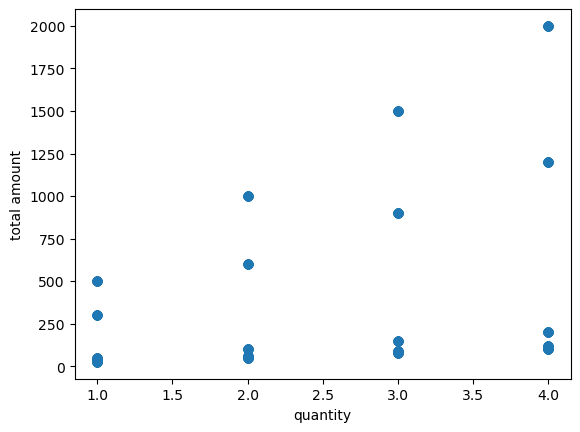

In [71]:
import matplotlib.pyplot as plt

plt.scatter(sales_data['Quantity'],sales_data['Total Amount'])
plt.xlabel('quantity')
plt.ylabel('total amount')
plt.show() 

<AxesSubplot:title={'center':'Total Amount Distribution'}, ylabel='Frequency'>

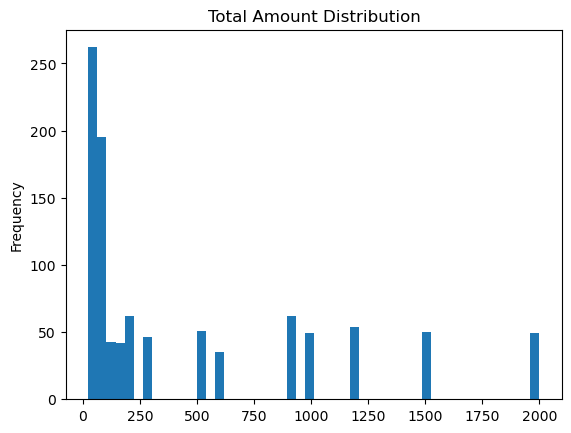

In [74]:
sales_data['Total Amount'].plot(kind='hist', bins=50, title='Total Amount Distribution')


In [98]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = 20)
sales_data = lof.fit_predict(sales_data['Total Amount'])
outliers = sales_data[sales_data['LOF_Score']==-1]


ValueError: Expected 2D array, got 1D array instead:
array=[ 150 1000   30  500  100   30   50  100  600  200  100   75 1500  120
 2000 1500  100   50   50  900  500  100  120  300   50 1000   50  500
   30  900 1200   90  100  150  900  900   75  200  120   50   50  900
  300   25   30 1200 1500  900 1000   75   75  300  100 1500  120  900
   30 1200   50  150  200  100   50  100 2000   30 1200  300   75  300
  100 2000   90 2000  200  100  100 1500  300   60   50  200  100   90
  150   90  100  500 2000   30  500  120 2000 1000   60  600 1000  100
 1200   30  600   50   25 1000  500   50 1200   75 2000  900 1500 1500
   50  100 1500   30 1000 2000  150   50  200  120   60 2000  100   90
   50  500  600  500  600  200  900   50   50  600 1000  200 2000   30
   50 1200   50 1500   75  200  300   60   75  120   50 2000 1000  900
 2000  100 2000  600  200  100 1000   60  150 1500 1200 2000  150  300
 1500   50  900   50  120  300  100  100  100   60  300  900 1200  120
  900  200   25  200  100   75   50   90   25  100 1500  200   30  900
  200  900 1500  150   25 1200 1000   25   25   25   50  200  200  200
 1500 1500 1500   60 1500  100  200   90   90  500  600  120   25   50
  100   50  100   60   90   25  150   25  600   50 1000   25 1000  500
 1500  300   75   25  900  100   90   50   60  900   50   50  200  300
 2000  500   30 1000 2000   50  200   60   50  120   60  900  900   60
   90   30 2000  300  120  100   50 1000 1000  100  100  100  500 1500
 2000  200  500  200   25   50  100  120   60  600  600 1200   90   90
  900 1200 1000 1200 1000  200  120  600   90   60   30   50   50 1200
   25   25  100  120 1500  120   60   50   90   25  500 1200   50  500
  900  150   50   75  150  100  100  200   90 1200 1200  900  120  150
  500  100   50 1200  200 2000   50   30   30 1000   25  600   50   75
   90 1000  500  200  500 1500   75  300   50  100 1200   25   25  500
  300  100   50 1200 1500   60   25 1500  600   75   50   30  200  300
   25  600  100 1000   90  500 1500  600   30   25   50  100   50  600
 1000  500 1000   30   25  600   60  200  300  600  600 1000 1200  100
  900  500  900  100  200 2000   75  100   60 2000  900 1000   90 2000
 1500   90   25 1200  120  150   25  200   50  900 1200 1000  200   50
  900  120 1200   30   75  600 1200  100  600   90  300   50 2000   60
  200   50   30 1500 1000   25  100   60  900  100 1200   50 1000 1200
 1500  600  150  100  150   25   75 1000  150  900   50 1500   75 2000
  120   60 1200 2000 1200 1200   30 1200   30   25 2000  900   30  150
  900  100   50  200   60  600  120  100   60  100   60  150 2000  150
   50 1500 1500  600  900  200  100   25  100  300  900  100  100   30
  120  100  120 1500  300 1200   50  100   50   60  150  120  500  120
 1500 1000   90  120  500  150  500  900  500   50  600   25   50  200
 2000   60  100  900  900   75 1200  150  300   50   90   25 1200   50
 2000   50   60  100   60   30  900  300  200  500   50 2000   60   50
  100  150 2000  120   30 1500   60  900  100  200   25   50 1200   60
 1000  900  100 2000   60  600 2000  300 1200  120  100 1000   30  300
   90  200 1000   50   75 1500  100  600 1500  500   90 1200  100  100
   30   50  100   75 1000   75  150  900  300 2000   50  200   50  100
   90  100  120 2000  900 1500  600  500  200  120  300  100   90   75
  120   90 1500 1200  600   30  150  100   75   75  500   90   25   25
   30 1000  100 1000 1200 2000   50  150  500  150 1200   30  150  100
 1500  300   60 1500 1500  900   90  900   60 1200 1000 1000   50  200
  300  100  100  900   90  100 1500   50  150  200  500  300  120 2000
   60  600  100   90   50  100  500  900 1000 1500 1500   50   75  500
  100 1200  500   75   60 1500  500  900  200  150  300 1200  900  150
 1200   50 2000 1000   30   30 2000  100   50  100   25  200  300 2000
 2000   25  100   90   30  150   30   75   50  100   30  100   75 1200
 1200  100  100  500  500   50   50   25  200  900   75   75  120   50
   50   30 2000   50  100   90  150  100 1000   50  500  900  300  500
  200  100   25  900 2000   25   25   50   30  300  300  120   75   50
  100 1200  200   30  100   30 1500  900  200 2000  100  100   50   75
  150  500   75 1000  200  500  100  200  300  150  100  120   25  300
  900 1200   90  150  100 2000  200   60  200   50   90  600 1200   50
  100  600 1500  150  500   50 1200   75   50 1000   50  300 1000   50
   25  120   50  100 1500  200   90 1200   50  500  300   50  500  300
 1500  120   60   75  100   30 2000  120   25   30   30 1000  300   50
  500   60  120  900  100  100   50   50  900   50   50   30  120   50
  100   90  600   60   30   50  200  500  300   50   25 1200  300  150
  900  150   90  500   90   50  200   90   50   75   75   50  900  100
  300   30 2000 1200   75  200  120  100   30  500   50  200  500  200
  300   30   50 1500 1200   50   25 2000  300   75   50  900  100   25
   90  900   25 1500  120   50   60   60  200   60   50  900  200 1000
   25  900  900 2000  200  100   50   30  200  600   75  150   25   75
   60   90  300  500   50 1000  900   75   25 1000  100   60  150 1000
   30   50   90  100  150  120].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
# lets go into the date and extract data based on time

In [88]:
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Day'] = sales_data['Date'].dt.day
sales_data['DayOfWeek'] = sales_data['Date'].dt.dayofweek
sales_data['isWeekend'] = sales_data['DayOfWeek'].apply(lambda x:1 if x>=5 else 0 )


In [93]:
# age calculation
bins = [0,20,40,60,80]
labels = ['<20','20-40','40-60','>60']
sales_data['Age Group'] = pd.cut(sales_data['Age'],bins=bins,labels=labels)


In [102]:
# now gender
sales_data['Gender Encoded'] = sales_data['Gender'].map({'Male':0 , 'Female' : 1 })


In [99]:
avg_price = sales_data.groupby('Product Category')['Price per Unit'].mean().reset_index()
avg_price.columns = ['Product Category', 'Avg Price']
sales_data = sales_data.merge(avg_price, on='Product Category', how='left')

In [103]:
product_popularity = sales_data['Product Category'].value_counts().reset_index()
product_popularity.columns = ['Product Category', 'Popularity']
sales_data = sales_data.merge(product_popularity, on= 'Product Category', how= 'left')
print(sales_data)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount   Z-score  ...  Day  DayofWeek  \
0        

In [106]:
sales_data['Price_Quantity_Interaction'] = sales_data['Price per Unit'] * sales_data['Quantity']

In [108]:
sales_data.drop(['Transaction ID'], axis=1, inplace=True)

In [110]:
sales_data.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Z-score,Year,...,DayofWeek,DayOfWeek,isWeekend,Age Group,Gender Encoded,Avg Price,Popularity_x,Popularity_y,Popularity,Price_Quantity_Interaction
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,-0.546704,2023,...,4,4,0,20-40,0,184.055375,307,307,307,150
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.971919,2023,...,0,0,0,20-40,1,174.287749,351,351,351,1000
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,-0.761098,2023,...,4,4,0,40-60,0,181.900585,342,342,342,30
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.078611,2023,...,6,6,1,20-40,0,174.287749,351,351,351,500
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,-0.636035,2023,...,5,5,1,20-40,0,184.055375,307,307,307,100


In [111]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1000 non-null   datetime64[ns]
 1   Customer ID                 1000 non-null   object        
 2   Gender                      1000 non-null   object        
 3   Age                         1000 non-null   int64         
 4   Product Category            1000 non-null   object        
 5   Quantity                    1000 non-null   int64         
 6   Price per Unit              1000 non-null   int64         
 7   Total Amount                1000 non-null   int64         
 8   Z-score                     1000 non-null   float64       
 9   Year                        1000 non-null   int64         
 10  Month                       1000 non-null   int64         
 11  Day                         1000 non-null   int64        

In [114]:
x = sales_data.drop(['Total Amount', 'Date'], axis=1)  # Exclude the target and unused columns
y = sales_data['Total Amount']

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 42)

In [120]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

/Users/ozgurtuna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [117]:
print(x.dtypes)

# Identify columns that are not numeric
non_numeric_columns = x.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

Customer ID                     object
Gender                          object
Age                              int64
Product Category                object
Quantity                         int64
Price per Unit                   int64
Z-score                        float64
Year                             int64
Month                            int64
Day                              int64
DayofWeek                        int64
DayOfWeek                        int64
isWeekend                        int64
Age Group                     category
Gender Encoded                   int64
Avg Price                      float64
Popularity_x                     int64
Popularity_y                     int64
Popularity                       int64
Price_Quantity_Interaction       int64
dtype: object
Non-numeric columns: Index(['Customer ID', 'Gender', 'Product Category'], dtype='object')


In [118]:
from sklearn.preprocessing import LabelEncoder

# Example for encoding non-numeric columns
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    x[col] = label_encoder.fit_transform(x[col])

In [119]:
print(x.dtypes)

# Identify columns that are not numeric
non_numeric_columns = x.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")


Customer ID                      int64
Gender                           int64
Age                              int64
Product Category                 int64
Quantity                         int64
Price per Unit                   int64
Z-score                        float64
Year                             int64
Month                            int64
Day                              int64
DayofWeek                        int64
DayOfWeek                        int64
isWeekend                        int64
Age Group                     category
Gender Encoded                   int64
Avg Price                      float64
Popularity_x                     int64
Popularity_y                     int64
Popularity                       int64
Price_Quantity_Interaction       int64
dtype: object
Non-numeric columns: Index([], dtype='object')


In [122]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/Users/ozgurtuna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [124]:
non_numeric_columns = x_train.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index(['Customer ID', 'Gender', 'Product Category'], dtype='object')


In [127]:
x_train = x_train.drop(['Gender', 'Product Category'], axis=1)
x_test = x_test.drop(['Gender', 'Product Category'], axis=1)

In [129]:
print(x_train.dtypes)
print(x_test.dtypes)

Age                              int64
Quantity                         int64
Price per Unit                   int64
Z-score                        float64
Year                             int64
Month                            int64
Day                              int64
DayofWeek                        int64
DayOfWeek                        int64
isWeekend                        int64
Age Group                     category
Gender Encoded                   int64
Avg Price                      float64
Popularity_x                     int64
Popularity_y                     int64
Popularity                       int64
Price_Quantity_Interaction       int64
dtype: object
Age                              int64
Quantity                         int64
Price per Unit                   int64
Z-score                        float64
Year                             int64
Month                            int64
Day                              int64
DayofWeek                        int64
DayOfWeek  

In [130]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/Users/ozgurtuna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [131]:
x_train = x_train.drop(['Age Group'], axis=1)
x_test = x_test.drop(['Age Group'], axis=1)

In [133]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [134]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 1.5219283858593409e-13
R² Score: 1.0
